# ***ULCER CLASSIFICATION***

**Using Convolutional Neural Networks (CNNs) for ulcer classification typically involves training a neural network to recognize and classify ulcers in medical images such as X-rays, CT scans, or endoscopic images. CNNs are a popular choice for image classification tasks due to their ability to automatically learn relevant features from images. Here's a theoretical overview of how you can classify ulcers using CNNs:**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aronfernandoj","key":"3f0ba5183050f450c969e25501142c61"}'}

# **Data Collection and Preprocessing**:

    Gather a labeled dataset of medical images containing ulcer and non-ulcer cases.
    Annotate each image to specify the location and type of ulcer (e.g., gastric ulcer, duodenal ulcer, etc.).
    Split the dataset into training, validation, and test sets

In [ ]:
!mkdir ~/.kaggle


In [ ]:
!mkdir aug_data

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d laithjj/diabetic-foot-ulcer-dfu

 98% 126M/129M [00:04<00:00, 36.6MB/s]
100% 129M/129M [00:04<00:00, 29.0MB/s]


In [ ]:
!unzip /content/diabetic-foot-ulcer-dfu.zip

Archive:  /content/diabetic-foot-ulcer-dfu.zip
  inflating: DFU/Original Images/1.jpg  
  inflating: DFU/Original Images/1.png  
  inflating: DFU/Original Images/10.jpg  
  inflating: DFU/Original Images/1054877509612379438.jpg  
  inflating: DFU/Original Images/1076771990506636278.jpg  
  inflating: DFU/Original Images/11.jpg  
  inflating: DFU/Original Images/12.jpg  
  inflating: DFU/Original Images/13.jpg  
  inflating: DFU/Original Images/14.jpg  
  inflating: DFU/Original Images/1430965400006561945.jpg  
  inflating: DFU/Original Images/15.jpg  
  inflating: DFU/Original Images/16.jpg  
  inflating: DFU/Original Images/17.JPG  
  inflating: DFU/Original Images/18.jpg  
  inflating: DFU/Original Images/19.jpg  
  inflating: DFU/Original Images/2 (2).jpg  
  inflating: DFU/Original Images/2.jpg  
  inflating: DFU/Original Images/2.png  
  inflating: DFU/Original Images/20.jpg  
  inflating: DFU/Original Images/21.jpg  
  inflating: DFU/Original Images/2100472819858240689.jpg  
  in

In [ ]:
data=tf.keras.utils.image_dataset_from_directory("/content/DFU/Patches",batch_size=32,image_size=(256,256))

Found 1055 files belonging to 2 classes.


In [ ]:
next(data.as_numpy_iterator())[0][0]

array([[[186.      , 142.      , 131.      ],
        [189.25    , 145.25    , 134.25    ],
        [193.4375  , 148.0625  , 135.6875  ],
        ...,
        [235.0625  , 199.0625  , 185.0625  ],
        [233.375   , 197.375   , 183.375   ],
        [235.      , 199.      , 185.      ]],

       [[186.      , 142.      , 131.      ],
        [189.25    , 145.25    , 134.25    ],
        [193.4375  , 148.0625  , 135.6875  ],
        ...,
        [236.1289  , 200.1289  , 186.1289  ],
        [234.84766 , 198.84766 , 184.84766 ],
        [235.8125  , 199.8125  , 185.8125  ]],

       [[188.75    , 142.6875  , 132.375   ],
        [191.4414  , 145.3789  , 135.0664  ],
        [194.08203 , 148.0625  , 135.90234 ],
        ...,
        [236.58984 , 200.58984 , 185.21484 ],
        [235.875   , 199.875   , 184.5     ],
        [236.6875  , 200.6875  , 185.3125  ]],

       ...,

       [[ 91.0625  ,  63.0625  ,  49.0625  ],
        [ 92.94141 ,  64.94141 ,  50.941406],
        [ 96.125   ,  

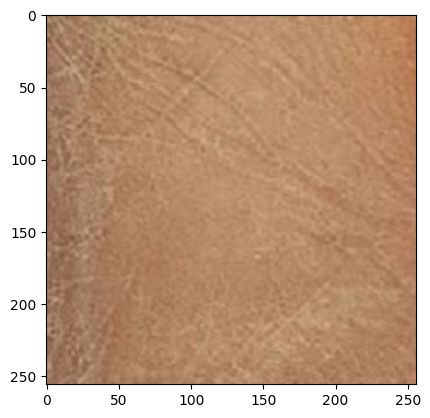

In [ ]:
plt.imshow(next(data.as_numpy_iterator())[0][0]/255.)

In [ ]:
len(data)

33

In [ ]:
import os
os.listdir('/content/aug_data')

[]

# **Data Augmentation:**

   Apply data augmentation techniques to increase the diversity of your training dataset. This can include random rotations, flips, zooms, and brightness adjustments.

In [ ]:
augm=tf.keras.models.Sequential()
augm.add(layers.Resizing(256,256))
augm.add(layers.RandomFlip())
augm.add(layers.RandomBrightness((-0.5,.1)))
augm.add(layers.RandomRotation((-0.5,0.5)))

In [ ]:
k = 0

In [ ]:
for i in os.listdir('/content/DFU/Patches'):
  #os.mkdir(os.path.join('/content/aug_data',i))
  for j in os.listdir(os.path.join('/content/DFU/Patches',i)):
        k+=1
        a=cv.imread(os.path.join('/content/DFU/Patches',i,j))
        aug2=augm(a)
        cv.imwrite(os.path.join("/content/aug_data",i,"aug_{}.jpg".format(k)),aug2.numpy())




In [ ]:
len(os.listdir("/content/aug_data/Abnormal(Ulcer)"))

2048

In [ ]:
data=tf.keras.utils.image_dataset_from_directory("/content/aug_data",batch_size=32,image_size=(256,256))

Found 4220 files belonging to 2 classes.


In [ ]:
train_ds=data.take(int(len(data)*0.8))
val_ds=data.skip(int(len(data)*0.8)).take(int(len(data)*0.1))
test_ds=data.skip(int(len(data)*0.9)).take(int(len(data)*0.1))


In [ ]:
len(test_ds)

13

# **CNN Architecture:**

  Design a CNN architecture suitable for your ulcer classification task. A typical CNN architecture consists of multiple layers, including:
  Convolutional layers: These layers apply convolution operations to learn features from the input images.
  Pooling layers: These layers downsample the feature maps, reducing the spatial dimensions.
  Fully connected layers: These layers are typically used for classification.

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import BinaryCrossentropy


In [ ]:
model=tf.keras.models.Sequential()
model.add(Conv2D(64,3,padding='valid', activation = "relu",input_shape=(256,256,3)))
model.add(MaxPool2D())
model.add(Conv2D(128,3,padding='valid',activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(128,3,padding='valid',activation="relu"))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
model.compile(loss = BinaryCrossentropy(),optimizer=Adam(),metrics=["accuracy"])

In [ ]:
callbacks=EarlyStopping(patience=3,monitor='val_accuracy',mode='max',restore_best_weights=True,min_delta=0.0001)

# **Training:**

  Initialize the CNN with random weights.
  Use a suitable loss function, such as categorical cross-entropy, to measure the difference between predicted and actual labels.
  Use an optimization algorithm like stochastic gradient descent (SGD) or Adam to update the network weights and minimize the loss.
  Train the CNN on the training dataset and validate it on the validation set to monitor performance.

In [ ]:
history=model.fit(train_ds,epochs=30,validation_data=val_ds,callbacks=[callbacks])

Epoch 1/30
105/105 [==============================] - 28s 142ms/step - loss: 2.9918 - accuracy: 0.7119 - val_loss: 0.5339 - val_accuracy: 0.7957
Epoch 2/30
105/105 [==============================] - 15s 139ms/step - loss: 0.6280 - accuracy: 0.7327 - val_loss: 0.5205 - val_accuracy: 0.7788
Epoch 3/30
105/105 [==============================] - 17s 164ms/step - loss: 0.6003 - accuracy: 0.7652 - val_loss: 0.5459 - val_accuracy: 0.7308
Epoch 4/30
105/105 [==============================] - 15s 139ms/step - loss: 0.7660 - accuracy: 0.7217 - val_loss: 0.5626 - val_accuracy: 0.7212


In [ ]:
pred=model.predict(test_ds)

13/13 [==============================] - 3s 38ms/step


In [ ]:
pred=np.squeeze(pred)

# **Evaluation**:

  Assess the model's performance on the test dataset to evaluate its ability to classify ulcers accurately.
  Calculate metrics like accuracy, precision, recall, F1-score, and ROC curves to quantify performance.

In [ ]:
new_pred=[]
for i in pred:
  if i<0.5:
    new_pred.append(0)
  else:
    new_pred.append(1)


In [ ]:
true_pred=[]
for i in iter(test_ds):
  for j in i[1].numpy():
    true_pred.append(j)

In [ ]:
len(true_pred)==len(new_pred)

True

In [ ]:
true_pred==new_pred

False

In [ ]:
cm=confusion_matrix(true_pred,new_pred)

In [ ]:
print(classification_report(true_pred,new_pred))

              precision    recall  f1-score   support

           0       0.49      0.46      0.47       191
           1       0.57      0.60      0.58       225

    accuracy                           0.54       416
   macro avg       0.53      0.53      0.53       416
weighted avg       0.53      0.54      0.53       416



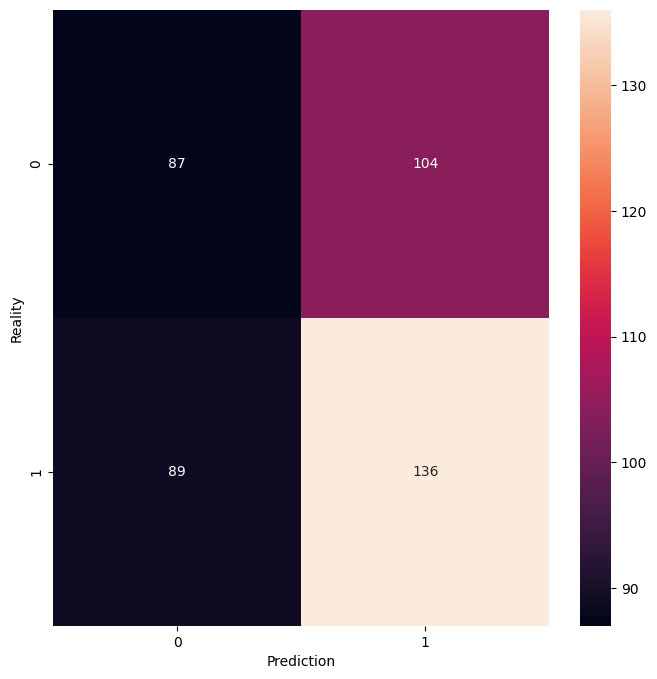

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Reality')
plt.show()